# TTS Data of HDPE Resins at 5 temperatures

Osamu Katagiri-Tanaka <A01212611@itesm.mx>

---

In [1]:
# PYTHON LIBRARIES
%matplotlib inline

import pandas as pd
import numpy as np
import datetime
import matplotlib as mpl
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

from adjustText import adjust_text
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
from sklearn.linear_model import LinearRegression

---
---
# Question/Problem to be solved:
## Get the master curve at $210 °C$ and get the complex viscosity at $T = 180 °C$ and $T = 225 °C$

---
# List all the data provided:
## I have the elastic ($G^{\prime}(\omega)$) and the loss ($G^{\prime\prime}(\omega)$) moduli for a HDPE at five temperatures: $170$, $190$, $210$, $230$, $250 °C$.


In [2]:
# Let's read and look at the provided data

df = pd.read_csv("./data.csv", delimiter=",");

df = df.reindex(sorted(df.columns), axis=1);
print("./data.csv"); display(df);

./data.csv


,G1_Sh170oC,G1_Sh190oC,G1_Sh210oC,G1_Sh230oC,G1_Sh250oC,G2_Sh170oC,G2_Sh190oC,G2_Sh210oC,G2_Sh230oC,G2_Sh250oC,frecuencia_Sh170oC,frecuencia_Sh190oC,frecuencia_Sh210oC,frecuencia_Sh230oC,frecuencia_Sh250oC
0,343000.0,298000.0,288545.00,251301.00,218582.00,175000.0,163000.0,169359.00,150515.00,137616.00,500.000,500.0000,500.000000,500.000000,500.000000
1,279000.0,241000.0,231412.00,199744.00,179203.00,155000.0,142000.0,146049.00,128738.00,120310.00,281.000,281.0000,281.172000,281.172000,315.477000
2,226000.0,192000.0,182623.00,156375.00,146499.00,136000.0,123000.0,124870.00,109503.00,105154.00,158.000,158.0000,158.117000,158.117000,199.051000
3,179000.0,151000.0,141545.00,120746.00,118516.00,118000.0,105000.0,105000.00,91613.60,91057.70,88.900,88.9000,88.916000,88.916000,125.592000
4,139000.0,116000.0,108073.00,91516.80,94743.10,101000.0,88500.0,86653.80,75213.80,77870.90,50.000,50.0000,50.002000,50.002000,79.242200
5,107000.0,87900.0,81183.40,68305.90,74972.20,83700.0,72700.0,70188.50,60615.80,65873.40,28.100,28.1000,28.118700,28.118700,49.998000
6,80300.0,65500.0,60144.90,50295.80,58668.40,68100.0,58500.0,55798.10,47883.30,54882.00,15.800,15.8000,15.812500,15.812500,31.546400
7,59600.0,48100.0,43975.30,36564.70,45439.30,54500.0,46200.0,43587.80,37176.90,45151.80,8.890,8.8900,8.892090,8.892090,19.904300
8,43600.0,34800.0,31760.00,26301.90,34878.80,42700.0,35800.0,33575.10,28394.40,36729.00,5.000,5.0000,5.000490,5.000490,12.558600
9,31500.0,24900.0,22724.80,18728.20,26547.30,33000.0,27400.0,25403.80,21383.50,29542.20,2.810,2.8100,2.812010,2.812010,7.923950


---
# List of assumptions, justifying each of them:
<ol>
    <li>All the specimens were run at the same % strain and using the same geometry and gap between the plates.</li>
    <li>The polymer was protected with antioxidants, so decomposition is not present.</li>
    <li>Assume that the lowest temparture  is greater than Tg+100 so I can use the Arrhenius equation for the calculation of the shift factors</li>
    <li>Linear polymers (HDPE, LLDPE, PP) and EVOH do not require a vertical shift, but long chain branched polymers do (LDPE, EVA)</li>
</ol>

---
# Algorithm for the solution
<ol>
    <li>Decide the reference temperature</li>
    <li>
        Do the calculations of tan del and $G^*$ where: <br>
        $\tan \delta = \frac{G^{\prime\prime}(\omega)}{G^{\prime}(\omega)}$ <br>
        $G^*(\omega) = {\left[ {G^{\prime\prime}(\omega)}^2 + {G^{\prime}(\omega)}^2 \right]}^{0.5}$
    </li>
    <li>
        According to the abstract of the Mavridis paper
        <ul>
            <li>Get the $\tan \delta$ vs. frequency using the data at each $T$ to get  $a_T$</li>
            <li>Get the  loss tangent vs. $G^*$ to get $b_T$</li>
        </ul>
    </li>
    <li>
        Plot $\tan \delta$ vs. $\omega$ for all temperatures in the same graph.
        <ul>
            <li>Multiply all the frequecies of a given temperature by a factor $a_T$ until it coincides with the reference plotted data.
</li>
            <li>Do that for each temperature</li>
        </ul>
    </li>
    <li>
        Plot $tan \delta$ vs. $G^*(\omega)$
        <ul>
            <li>If needed multiply $G^*(\omega)$ by a $b_T$ like in point 4</li>
        </ul>
    </li>
</ol>

---
---
# Solution
## $$ tan \delta = \frac{G^{\prime\prime}(\omega)}{G^{\prime}(\omega)} $$

In [3]:
def _tand(G1, G2):
    tand = G2 / G1;
    return tand;

# Iterate the data per sample
sample_id = '';
for i in range(len(df.columns)):
    if ("frecuencia" in df.columns[i]):
        sample_id = df.columns[i].split('_')[1];
        
        # Compute tan d
        df['tand_' + sample_id] = _tand(df['G1_' + sample_id], df['G2_' + sample_id]);

df = df.reindex(sorted(df.columns), axis=1);
print("./data.csv"); display(df);

./data.csv


,G1_Sh170oC,G1_Sh190oC,G1_Sh210oC,G1_Sh230oC,G1_Sh250oC,G2_Sh170oC,G2_Sh190oC,G2_Sh210oC,G2_Sh230oC,G2_Sh250oC,frecuencia_Sh170oC,frecuencia_Sh190oC,frecuencia_Sh210oC,frecuencia_Sh230oC,frecuencia_Sh250oC,tand_Sh170oC,tand_Sh190oC,tand_Sh210oC,tand_Sh230oC,tand_Sh250oC
0,343000.0,298000.0,288545.00,251301.00,218582.00,175000.0,163000.0,169359.00,150515.00,137616.00,500.000,500.0000,500.000000,500.000000,500.000000,0.510204,0.546980,0.586941,0.598943,0.629585
1,279000.0,241000.0,231412.00,199744.00,179203.00,155000.0,142000.0,146049.00,128738.00,120310.00,281.000,281.0000,281.172000,281.172000,315.477000,0.555556,0.589212,0.631121,0.644515,0.671362
2,226000.0,192000.0,182623.00,156375.00,146499.00,136000.0,123000.0,124870.00,109503.00,105154.00,158.000,158.0000,158.117000,158.117000,199.051000,0.601770,0.640625,0.683758,0.700259,0.717780
3,179000.0,151000.0,141545.00,120746.00,118516.00,118000.0,105000.0,105000.00,91613.60,91057.70,88.900,88.9000,88.916000,88.916000,125.592000,0.659218,0.695364,0.741814,0.758730,0.768316
4,139000.0,116000.0,108073.00,91516.80,94743.10,101000.0,88500.0,86653.80,75213.80,77870.90,50.000,50.0000,50.002000,50.002000,79.242200,0.726619,0.762931,0.801808,0.821858,0.821916
5,107000.0,87900.0,81183.40,68305.90,74972.20,83700.0,72700.0,70188.50,60615.80,65873.40,28.100,28.1000,28.118700,28.118700,49.998000,0.782243,0.827076,0.864567,0.887417,0.878638
6,80300.0,65500.0,60144.90,50295.80,58668.40,68100.0,58500.0,55798.10,47883.30,54882.00,15.800,15.8000,15.812500,15.812500,31.546400,0.848070,0.893130,0.927728,0.952034,0.935461
7,59600.0,48100.0,43975.30,36564.70,45439.30,54500.0,46200.0,43587.80,37176.90,45151.80,8.890,8.8900,8.892090,8.892090,19.904300,0.914430,0.960499,0.991188,1.016743,0.993673
8,43600.0,34800.0,31760.00,26301.90,34878.80,42700.0,35800.0,33575.10,28394.40,36729.00,5.000,5.0000,5.000490,5.000490,12.558600,0.979358,1.028736,1.057151,1.079557,1.053047
9,31500.0,24900.0,22724.80,18728.20,26547.30,33000.0,27400.0,25403.80,21383.50,29542.20,2.810,2.8100,2.812010,2.812010,7.923950,1.047619,1.100402,1.117889,1.141781,1.112814


---
## Plot $tan \delta$ vs. frequency for each $T$

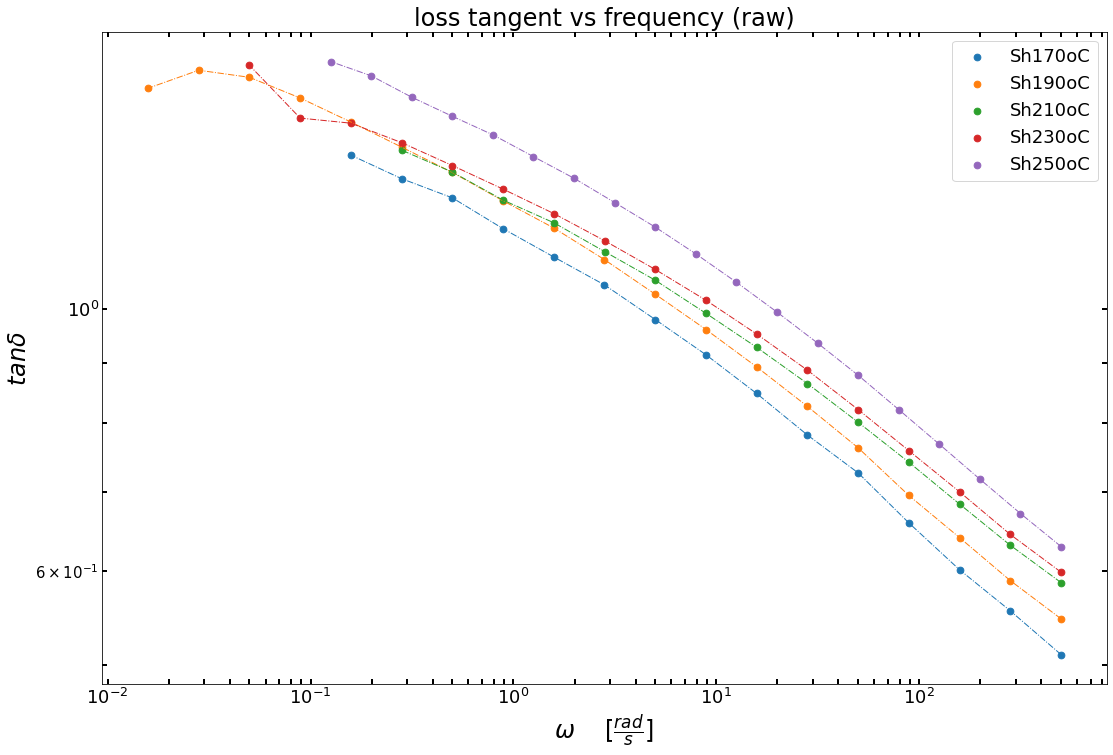

In [4]:
# Set plot size and axis labels' font size
pltname = "loss tangent vs frequency (raw)";
scale   = 6;
fig     = plt.figure(figsize=(3*scale, 2*scale));
plt.rc('xtick', labelsize=15);
plt.rc('ytick', labelsize=15);
plt.tight_layout();

# Iterate the data per sample
sample_id = '';
for i in range(len(df.columns)):
    if ("frecuencia" in df.columns[i]):
        sample_id = df.columns[i].split('_')[1];
        
        # Define x axis as the date axis
        x_str = 'frecuencia_' + sample_id; x_units = r'$[\frac{rad}{s}]$';
        y_str = 'tand_' + sample_id;       y_units = '';

        # Remove NANs from interesting x,y data
        df_fil = pd.DataFrame(df);
        df_fil = df_fil.dropna(subset=[x_str, y_str]);

        # Stablish the plot area
        ax0 = plt.gca();

        # Extract data from a specific country
        x  = df_fil.iloc[:][x_str];
        y = df_fil.iloc[:][y_str];

        # Scatter the data and plot a curve to join the points
        plt.scatter(x, y, s=45, marker='o', label=sample_id);
        plt.plot(x, y, linewidth=1, linestyle='-.');
        
# Show the plot lengend to link colors and polymer names
handles, labels = ax0.get_legend_handles_labels();
lgd = dict(zip(labels, handles));

# fig.autofmt_xdate();
ax0.set_xlabel(r'$\omega$' + '    ' + x_units, fontsize=24);
ax0.set_ylabel(r'$tan \delta$', fontsize=24);

for tick in ax0.xaxis.get_major_ticks(): tick.label.set_fontsize(18);
for tick in ax0.yaxis.get_major_ticks(): tick.label.set_fontsize(18);
ax0.tick_params(which='both', direction='in', length=5, width=2, bottom=True, top=True, left=True, right=True);

# Display main plot
plt.yscale('log');
plt.xscale('log');
plt.legend(lgd.values(), lgd.keys(), prop={'size': 18}, loc="best");
plt.title(pltname, size=24);
plt.savefig(pltname + '.png', dpi=200, bbox_inches='tight');
plt.show();
mpl.rcParams.update(mpl.rcParamsDefault); # Recover matplotlib defaults

---
## Manually shift the curves to obtain the horizontal shift factor $a_T$

In [5]:
# a_T was manually tuned until TTS
a_T = pd.Series([1.90, 1.20, 1.00, 0.85, 0.50]);

# Iterate the data per sample
sample_id = '';
sample_cnt = 0;
for i in range(len(df.columns)):
    if ("frecuencia_" in df.columns[i]):
        sample_id = df.columns[i].split('_')[1];
        
        # Compute tan d
        df['aT_frequency_' + sample_id] = df['frecuencia_' + sample_id] * a_T[sample_cnt];
        
        sample_cnt = sample_cnt + 1;

df = df.reindex(sorted(df.columns), axis=1);
print("./data.csv"); display(df);

./data.csv


,G1_Sh170oC,G1_Sh190oC,G1_Sh210oC,G1_Sh230oC,G1_Sh250oC,G2_Sh170oC,G2_Sh190oC,G2_Sh210oC,G2_Sh230oC,G2_Sh250oC,aT_frequency_Sh170oC,aT_frequency_Sh190oC,aT_frequency_Sh210oC,aT_frequency_Sh230oC,aT_frequency_Sh250oC,frecuencia_Sh170oC,frecuencia_Sh190oC,frecuencia_Sh210oC,frecuencia_Sh230oC,frecuencia_Sh250oC,tand_Sh170oC,tand_Sh190oC,tand_Sh210oC,tand_Sh230oC,tand_Sh250oC
0,343000.0,298000.0,288545.00,251301.00,218582.00,175000.0,163000.0,169359.00,150515.00,137616.00,950.0000,600.00000,500.000000,425.000000,250.000000,500.000,500.0000,500.000000,500.000000,500.000000,0.510204,0.546980,0.586941,0.598943,0.629585
1,279000.0,241000.0,231412.00,199744.00,179203.00,155000.0,142000.0,146049.00,128738.00,120310.00,533.9000,337.20000,281.172000,238.996200,157.738500,281.000,281.0000,281.172000,281.172000,315.477000,0.555556,0.589212,0.631121,0.644515,0.671362
2,226000.0,192000.0,182623.00,156375.00,146499.00,136000.0,123000.0,124870.00,109503.00,105154.00,300.2000,189.60000,158.117000,134.399450,99.525500,158.000,158.0000,158.117000,158.117000,199.051000,0.601770,0.640625,0.683758,0.700259,0.717780
3,179000.0,151000.0,141545.00,120746.00,118516.00,118000.0,105000.0,105000.00,91613.60,91057.70,168.9100,106.68000,88.916000,75.578600,62.796000,88.900,88.9000,88.916000,88.916000,125.592000,0.659218,0.695364,0.741814,0.758730,0.768316
4,139000.0,116000.0,108073.00,91516.80,94743.10,101000.0,88500.0,86653.80,75213.80,77870.90,95.0000,60.00000,50.002000,42.501700,39.621100,50.000,50.0000,50.002000,50.002000,79.242200,0.726619,0.762931,0.801808,0.821858,0.821916
5,107000.0,87900.0,81183.40,68305.90,74972.20,83700.0,72700.0,70188.50,60615.80,65873.40,53.3900,33.72000,28.118700,23.900895,24.999000,28.100,28.1000,28.118700,28.118700,49.998000,0.782243,0.827076,0.864567,0.887417,0.878638
6,80300.0,65500.0,60144.90,50295.80,58668.40,68100.0,58500.0,55798.10,47883.30,54882.00,30.0200,18.96000,15.812500,13.440625,15.773200,15.800,15.8000,15.812500,15.812500,31.546400,0.848070,0.893130,0.927728,0.952034,0.935461
7,59600.0,48100.0,43975.30,36564.70,45439.30,54500.0,46200.0,43587.80,37176.90,45151.80,16.8910,10.66800,8.892090,7.558276,9.952150,8.890,8.8900,8.892090,8.892090,19.904300,0.914430,0.960499,0.991188,1.016743,0.993673
8,43600.0,34800.0,31760.00,26301.90,34878.80,42700.0,35800.0,33575.10,28394.40,36729.00,9.5000,6.00000,5.000490,4.250417,6.279300,5.000,5.0000,5.000490,5.000490,12.558600,0.979358,1.028736,1.057151,1.079557,1.053047
9,31500.0,24900.0,22724.80,18728.20,26547.30,33000.0,27400.0,25403.80,21383.50,29542.20,5.3390,3.37200,2.812010,2.390208,3.961975,2.810,2.8100,2.812010,2.812010,7.923950,1.047619,1.100402,1.117889,1.141781,1.112814


---
## Plot $\tan \delta$ vs. frequency for each $T$

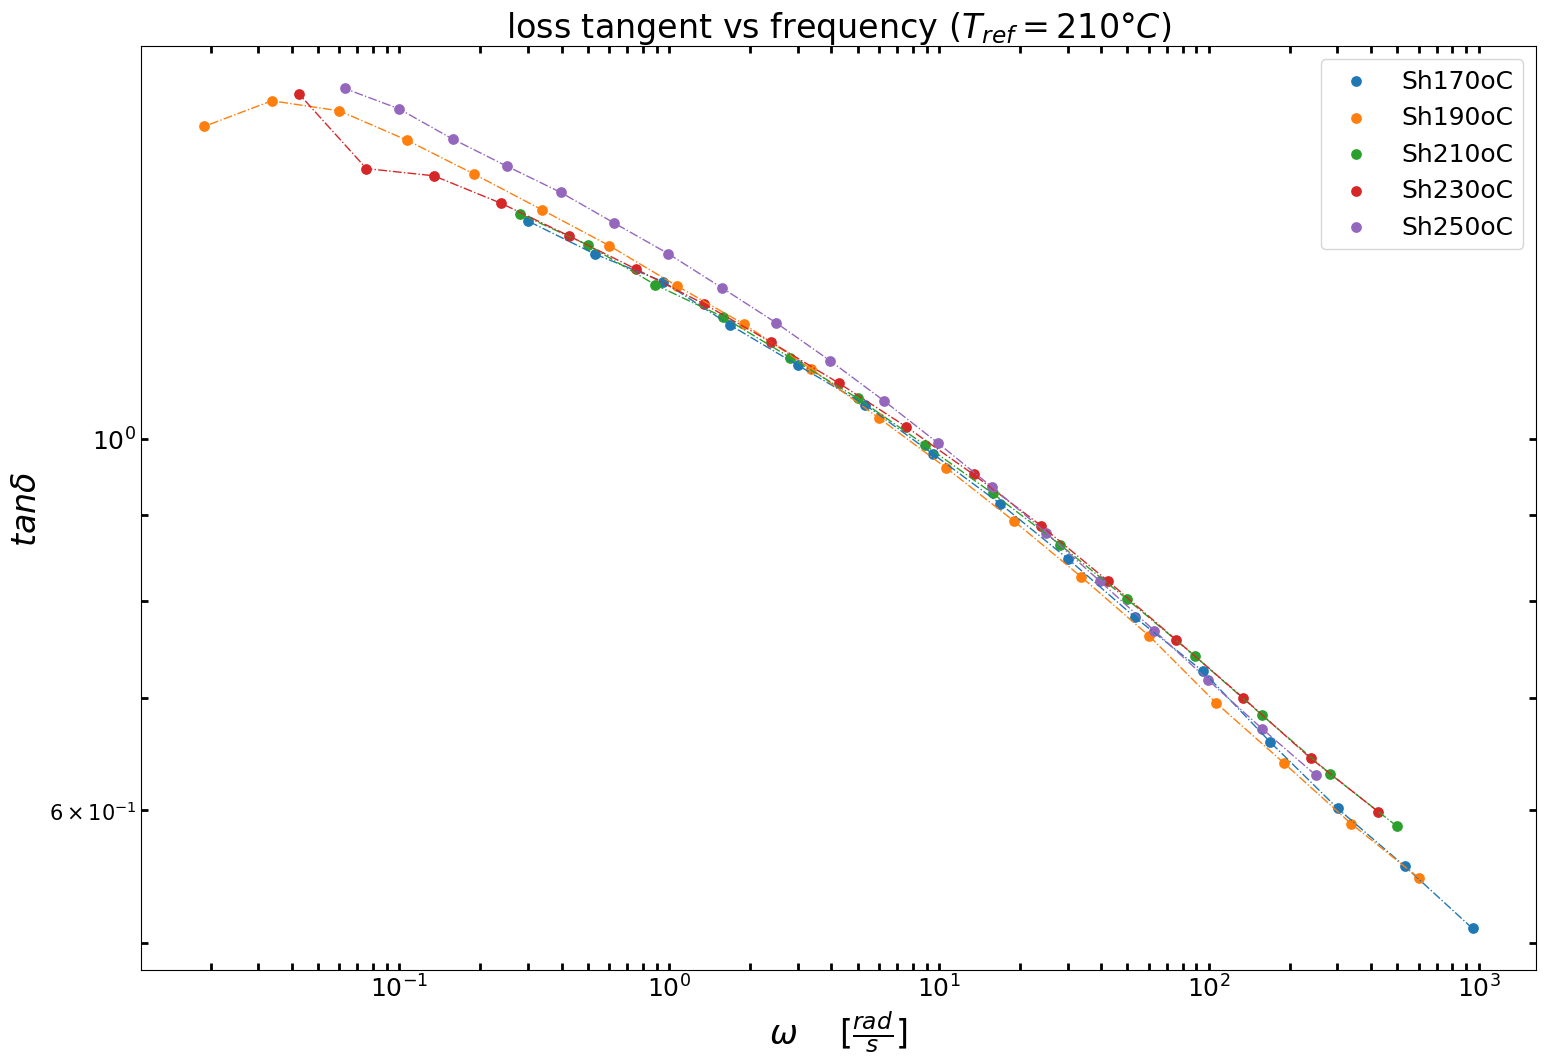

In [6]:
# Set plot size and axis labels' font size
pltname = "loss tangent vs frequency (" + r'$T_{ref} = 210°C$' + ")";
scale   = 6;
fig     = plt.figure(figsize=(3*scale, 2*scale));
plt.rc('xtick', labelsize=15);
plt.rc('ytick', labelsize=15);
plt.tight_layout();

# Iterate the data per sample
sample_id = '';
for i in range(len(df.columns)):
    if ("frecuencia" in df.columns[i]):
        sample_id = df.columns[i].split('_')[1];
        
        # Define x axis as the date axis
        x_str = 'aT_frequency_' + sample_id; x_units = r'$[\frac{rad}{s}]$';
        y_str = 'tand_' + sample_id;       y_units = '';

        # Remove NANs from interesting x,y data
        df_fil = pd.DataFrame(df);
        df_fil = df_fil.dropna(subset=[x_str, y_str]);

        # Stablish the plot area
        ax0 = plt.gca();

        # Extract data from a specific country
        x  = df_fil.iloc[:][x_str];
        y = df_fil.iloc[:][y_str];

        # Scatter the data and plot a curve to join the points
        plt.scatter(x, y, s=45, marker='o', label=sample_id);
        plt.plot(x, y, linewidth=1, linestyle='-.');
        
# Show the plot lengend to link colors and polymer names
handles, labels = ax0.get_legend_handles_labels();
lgd = dict(zip(labels, handles));

# fig.autofmt_xdate();
ax0.set_xlabel(r'$\omega$' + '    ' + x_units, fontsize=24);
ax0.set_ylabel(r'$tan \delta$', fontsize=24);

for tick in ax0.xaxis.get_major_ticks(): tick.label.set_fontsize(18);
for tick in ax0.yaxis.get_major_ticks(): tick.label.set_fontsize(18);
ax0.tick_params(which='both', direction='in', length=5, width=2, bottom=True, top=True, left=True, right=True);

# Display main plot
plt.yscale('log');
plt.xscale('log');
plt.legend(lgd.values(), lgd.keys(), prop={'size': 18}, loc="best");
plt.title(pltname, size=24);
plt.savefig(pltname + '.png', dpi=200, bbox_inches='tight');
plt.show();
mpl.rcParams.update(mpl.rcParamsDefault); # Recover matplotlib defaults

---
## $$ G^*(\omega) = {\left[ {G^{\prime\prime}(\omega)}^2 + {G^{\prime}(\omega)}^2 \right]}^{0.5} $$

In [7]:
def _Gc(G1, G2):
    Gc = np.sqrt(G2**2 + G1**2);
    return Gc;

# Iterate the data per sample
sample_id = '';
for i in range(len(df.columns)):
    if ("frecuencia" in df.columns[i]):
        sample_id = df.columns[i].split('_')[1];
        
        # Compute Complex Viscosity
        df['Gc_' + sample_id] = _Gc(df['G1_' + sample_id], df['G2_' + sample_id]);

df = df.reindex(sorted(df.columns), axis=1);
print("./data.csv"); display(df);

./data.csv


,G1_Sh170oC,G1_Sh190oC,G1_Sh210oC,G1_Sh230oC,G1_Sh250oC,G2_Sh170oC,G2_Sh190oC,G2_Sh210oC,G2_Sh230oC,G2_Sh250oC,Gc_Sh170oC,Gc_Sh190oC,Gc_Sh210oC,Gc_Sh230oC,Gc_Sh250oC,aT_frequency_Sh170oC,aT_frequency_Sh190oC,aT_frequency_Sh210oC,aT_frequency_Sh230oC,aT_frequency_Sh250oC,frecuencia_Sh170oC,frecuencia_Sh190oC,frecuencia_Sh210oC,frecuencia_Sh230oC,frecuencia_Sh250oC,tand_Sh170oC,tand_Sh190oC,tand_Sh210oC,tand_Sh230oC,tand_Sh250oC
0,343000.0,298000.0,288545.00,251301.00,218582.00,175000.0,163000.0,169359.00,150515.00,137616.00,385063.631105,339666.012430,334575.384489,292928.246890,258294.897704,950.0000,600.00000,500.000000,425.000000,250.000000,500.000,500.0000,500.000000,500.000000,500.000000,0.510204,0.546980,0.586941,0.598943,0.629585
1,279000.0,241000.0,231412.00,199744.00,179203.00,155000.0,142000.0,146049.00,128738.00,120310.00,319164.534371,279723.077346,273645.435089,237636.567430,215843.024694,533.9000,337.20000,281.172000,238.996200,157.738500,281.000,281.0000,281.172000,281.172000,315.477000,0.555556,0.589212,0.631121,0.644515,0.671362
2,226000.0,192000.0,182623.00,156375.00,146499.00,136000.0,123000.0,124870.00,109503.00,105154.00,263765.046964,228019.735988,221232.179009,190903.241549,180331.141839,300.2000,189.60000,158.117000,134.399450,99.525500,158.000,158.0000,158.117000,158.117000,199.051000,0.601770,0.640625,0.683758,0.700259,0.717780
3,179000.0,151000.0,141545.00,120746.00,118516.00,118000.0,105000.0,105000.00,91613.60,91057.70,214394.496198,183918.460194,176238.437990,151567.305910,149457.508963,168.9100,106.68000,88.916000,75.578600,62.796000,88.900,88.9000,88.916000,88.916000,125.592000,0.659218,0.695364,0.741814,0.758730,0.768316
4,139000.0,116000.0,108073.00,91516.80,94743.10,101000.0,88500.0,86653.80,75213.80,77870.90,171819.672913,145904.934803,138523.118588,118458.602021,122638.216166,95.0000,60.00000,50.002000,42.501700,39.621100,50.000,50.0000,50.002000,50.002000,79.242200,0.726619,0.762931,0.801808,0.821858,0.821916
5,107000.0,87900.0,81183.40,68305.90,74972.20,83700.0,72700.0,70188.50,60615.80,65873.40,135848.040104,114068.838865,107318.078476,91323.442688,99800.478959,53.3900,33.72000,28.118700,23.900895,24.999000,28.100,28.1000,28.118700,28.118700,49.998000,0.782243,0.827076,0.864567,0.887417,0.878638
6,80300.0,65500.0,60144.90,50295.80,58668.40,68100.0,58500.0,55798.10,47883.30,54882.00,105288.650860,87820.840351,82041.678186,69444.063220,80336.884944,30.0200,18.96000,15.812500,13.440625,15.773200,15.800,15.8000,15.812500,15.812500,31.546400,0.848070,0.893130,0.927728,0.952034,0.935461
7,59600.0,48100.0,43975.30,36564.70,45439.30,54500.0,46200.0,43587.80,37176.90,45151.80,80761.438818,66693.702851,61917.068074,52144.982306,64057.903710,16.8910,10.66800,8.892090,7.558276,9.952150,8.890,8.8900,8.892090,8.892090,19.904300,0.914430,0.960499,0.991188,1.016743,0.993673
8,43600.0,34800.0,31760.00,26301.90,34878.80,42700.0,35800.0,33575.10,28394.40,36729.00,61026.633530,49926.746339,46216.717106,38704.416996,50651.259910,9.5000,6.00000,5.000490,4.250417,6.279300,5.000,5.0000,5.000490,5.000490,12.558600,0.979358,1.028736,1.057151,1.079557,1.053047
9,31500.0,24900.0,22724.80,18728.20,26547.30,33000.0,27400.0,25403.80,21383.50,29542.20,45620.718977,37023.911193,34084.741300,28425.332847,39717.763257,5.3390,3.37200,2.812010,2.390208,3.961975,2.810,2.8100,2.812010,2.812010,7.923950,1.047619,1.100402,1.117889,1.141781,1.112814


---
## Plot $\tan \delta$ vs. $G^*(\omega)$ for each $T$

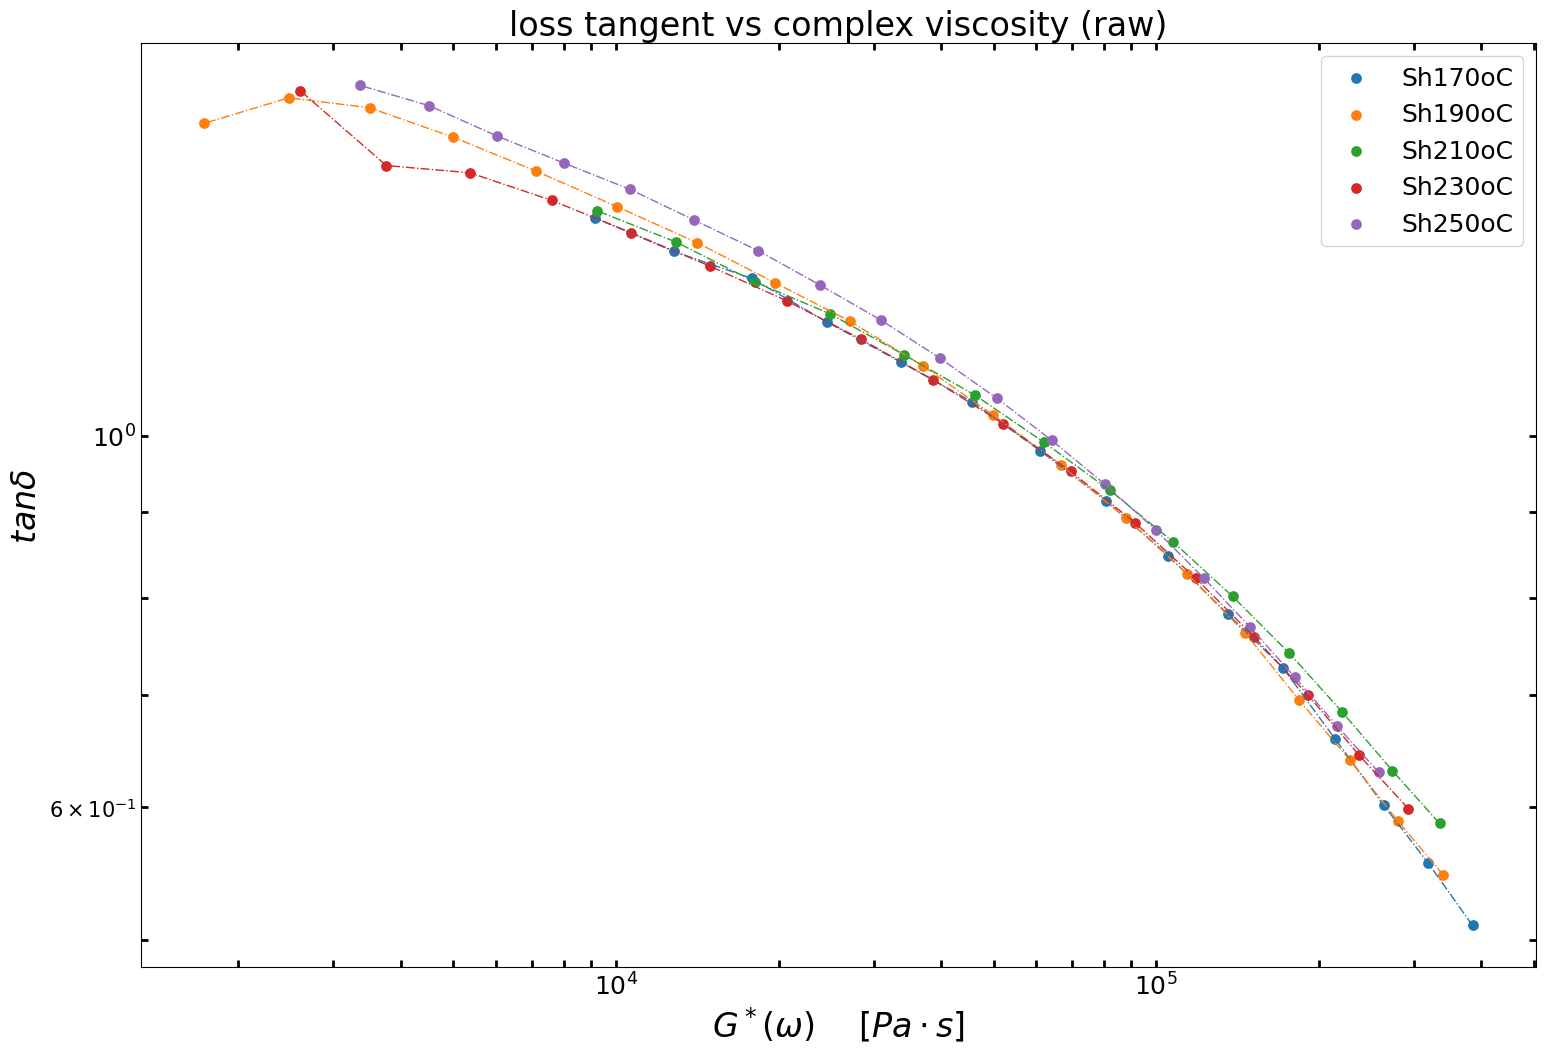

In [8]:
# Set plot size and axis labels' font size
pltname = "loss tangent vs complex viscosity (raw)";
scale   = 6;
fig     = plt.figure(figsize=(3*scale, 2*scale));
plt.rc('xtick', labelsize=15);
plt.rc('ytick', labelsize=15);
plt.tight_layout();

# Iterate the data per sample
sample_id = '';
for i in range(len(df.columns)):
    if ("frecuencia" in df.columns[i]):
        sample_id = df.columns[i].split('_')[1];
        
        # Define x axis as the date axis
        x_str = 'Gc_' + sample_id; x_units = r'$[Pa \cdot s]$';
        y_str = 'tand_' + sample_id;         y_units = '';

        # Remove NANs from interesting x,y data
        df_fil = pd.DataFrame(df);
        df_fil = df_fil.dropna(subset=[x_str, y_str]);

        # Stablish the plot area
        ax0 = plt.gca();

        # Extract data from a specific country
        x  = df_fil.iloc[:][x_str];
        y = df_fil.iloc[:][y_str];

        # Scatter the data and plot a curve to join the points
        plt.scatter(x, y, s=45, marker='o', label=sample_id);
        plt.plot(x, y, linewidth=1, linestyle='-.');
        
# Show the plot lengend to link colors and polymer names
handles, labels = ax0.get_legend_handles_labels();
lgd = dict(zip(labels, handles));

# fig.autofmt_xdate();
ax0.set_xlabel(r'$G^*(\omega)$' + '    ' + x_units, fontsize=24);
ax0.set_ylabel(r'$tan \delta$', fontsize=24);

for tick in ax0.xaxis.get_major_ticks(): tick.label.set_fontsize(18);
for tick in ax0.yaxis.get_major_ticks(): tick.label.set_fontsize(18);
ax0.tick_params(which='both', direction='in', length=5, width=2, bottom=True, top=True, left=True, right=True);

# Display main plot
plt.yscale('log');
plt.xscale('log');
plt.legend(lgd.values(), lgd.keys(), prop={'size': 18}, loc="best");
plt.title(pltname, size=24);
plt.savefig(pltname + '.png', dpi=200, bbox_inches='tight');
plt.show();
mpl.rcParams.update(mpl.rcParamsDefault); # Recover matplotlib defaults

---
## Manually shift the curves to obtain the vertical shift factor $b_T$

In [9]:
# a_T was manually tuned until TTS
b_T = pd.Series([1.1, 1.05, 1, 1.1, 1.08]);

# Iterate the data per sample
sample_id = '';
sample_cnt = 0;
for i in range(len(df.columns)):
    if ("frecuencia_" in df.columns[i]):
        sample_id = df.columns[i].split('_')[1];
        
        # Compute tan d
        df['bT_Gc_' + sample_id] = df['Gc_' + sample_id] * b_T[sample_cnt];
        
        sample_cnt = sample_cnt + 1;

df = df.reindex(sorted(df.columns), axis=1);
print("./data.csv"); display(df);

./data.csv


,G1_Sh170oC,G1_Sh190oC,G1_Sh210oC,G1_Sh230oC,G1_Sh250oC,G2_Sh170oC,G2_Sh190oC,G2_Sh210oC,G2_Sh230oC,G2_Sh250oC,Gc_Sh170oC,Gc_Sh190oC,Gc_Sh210oC,Gc_Sh230oC,Gc_Sh250oC,aT_frequency_Sh170oC,aT_frequency_Sh190oC,aT_frequency_Sh210oC,aT_frequency_Sh230oC,aT_frequency_Sh250oC,bT_Gc_Sh170oC,bT_Gc_Sh190oC,bT_Gc_Sh210oC,bT_Gc_Sh230oC,bT_Gc_Sh250oC,frecuencia_Sh170oC,frecuencia_Sh190oC,frecuencia_Sh210oC,frecuencia_Sh230oC,frecuencia_Sh250oC,tand_Sh170oC,tand_Sh190oC,tand_Sh210oC,tand_Sh230oC,tand_Sh250oC
0,343000.0,298000.0,288545.00,251301.00,218582.00,175000.0,163000.0,169359.00,150515.00,137616.00,385063.631105,339666.012430,334575.384489,292928.246890,258294.897704,950.0000,600.00000,500.000000,425.000000,250.000000,423569.994216,356649.313051,334575.384489,322221.071579,278958.489520,500.000,500.0000,500.000000,500.000000,500.000000,0.510204,0.546980,0.586941,0.598943,0.629585
1,279000.0,241000.0,231412.00,199744.00,179203.00,155000.0,142000.0,146049.00,128738.00,120310.00,319164.534371,279723.077346,273645.435089,237636.567430,215843.024694,533.9000,337.20000,281.172000,238.996200,157.738500,351080.987808,293709.231213,273645.435089,261400.224173,233110.466669,281.000,281.0000,281.172000,281.172000,315.477000,0.555556,0.589212,0.631121,0.644515,0.671362
2,226000.0,192000.0,182623.00,156375.00,146499.00,136000.0,123000.0,124870.00,109503.00,105154.00,263765.046964,228019.735988,221232.179009,190903.241549,180331.141839,300.2000,189.60000,158.117000,134.399450,99.525500,290141.551661,239420.722787,221232.179009,209993.565704,194757.633186,158.000,158.0000,158.117000,158.117000,199.051000,0.601770,0.640625,0.683758,0.700259,0.717780
3,179000.0,151000.0,141545.00,120746.00,118516.00,118000.0,105000.0,105000.00,91613.60,91057.70,214394.496198,183918.460194,176238.437990,151567.305910,149457.508963,168.9100,106.68000,88.916000,75.578600,62.796000,235833.945818,193114.383203,176238.437990,166724.036502,161414.109680,88.900,88.9000,88.916000,88.916000,125.592000,0.659218,0.695364,0.741814,0.758730,0.768316
4,139000.0,116000.0,108073.00,91516.80,94743.10,101000.0,88500.0,86653.80,75213.80,77870.90,171819.672913,145904.934803,138523.118588,118458.602021,122638.216166,95.0000,60.00000,50.002000,42.501700,39.621100,189001.640205,153200.181544,138523.118588,130304.462223,132449.273459,50.000,50.0000,50.002000,50.002000,79.242200,0.726619,0.762931,0.801808,0.821858,0.821916
5,107000.0,87900.0,81183.40,68305.90,74972.20,83700.0,72700.0,70188.50,60615.80,65873.40,135848.040104,114068.838865,107318.078476,91323.442688,99800.478959,53.3900,33.72000,28.118700,23.900895,24.999000,149432.844114,119772.280808,107318.078476,100455.786957,107784.517275,28.100,28.1000,28.118700,28.118700,49.998000,0.782243,0.827076,0.864567,0.887417,0.878638
6,80300.0,65500.0,60144.90,50295.80,58668.40,68100.0,58500.0,55798.10,47883.30,54882.00,105288.650860,87820.840351,82041.678186,69444.063220,80336.884944,30.0200,18.96000,15.812500,13.440625,15.773200,115817.515946,92211.882369,82041.678186,76388.469542,86763.835740,15.800,15.8000,15.812500,15.812500,31.546400,0.848070,0.893130,0.927728,0.952034,0.935461
7,59600.0,48100.0,43975.30,36564.70,45439.30,54500.0,46200.0,43587.80,37176.90,45151.80,80761.438818,66693.702851,61917.068074,52144.982306,64057.903710,16.8910,10.66800,8.892090,7.558276,9.952150,88837.582700,70028.387994,61917.068074,57359.480537,69182.536007,8.890,8.8900,8.892090,8.892090,19.904300,0.914430,0.960499,0.991188,1.016743,0.993673
8,43600.0,34800.0,31760.00,26301.90,34878.80,42700.0,35800.0,33575.10,28394.40,36729.00,61026.633530,49926.746339,46216.717106,38704.416996,50651.259910,9.5000,6.00000,5.000490,4.250417,6.279300,67129.296883,52423.083656,46216.717106,42574.858695,54703.360702,5.000,5.0000,5.000490,5.000490,12.558600,0.979358,1.028736,1.057151,1.079557,1.053047
9,31500.0,24900.0,22724.80,18728.20,26547.30,33000.0,27400.0,25403.80,21383.50,29542.20,45620.718977,37023.911193,34084.741300,28425.332847,39717.763257,5.3390,3.37200,2.812010,2.390208

---
## Plot $\tan \delta$ vs. $G^*(\omega)$ for each $T$

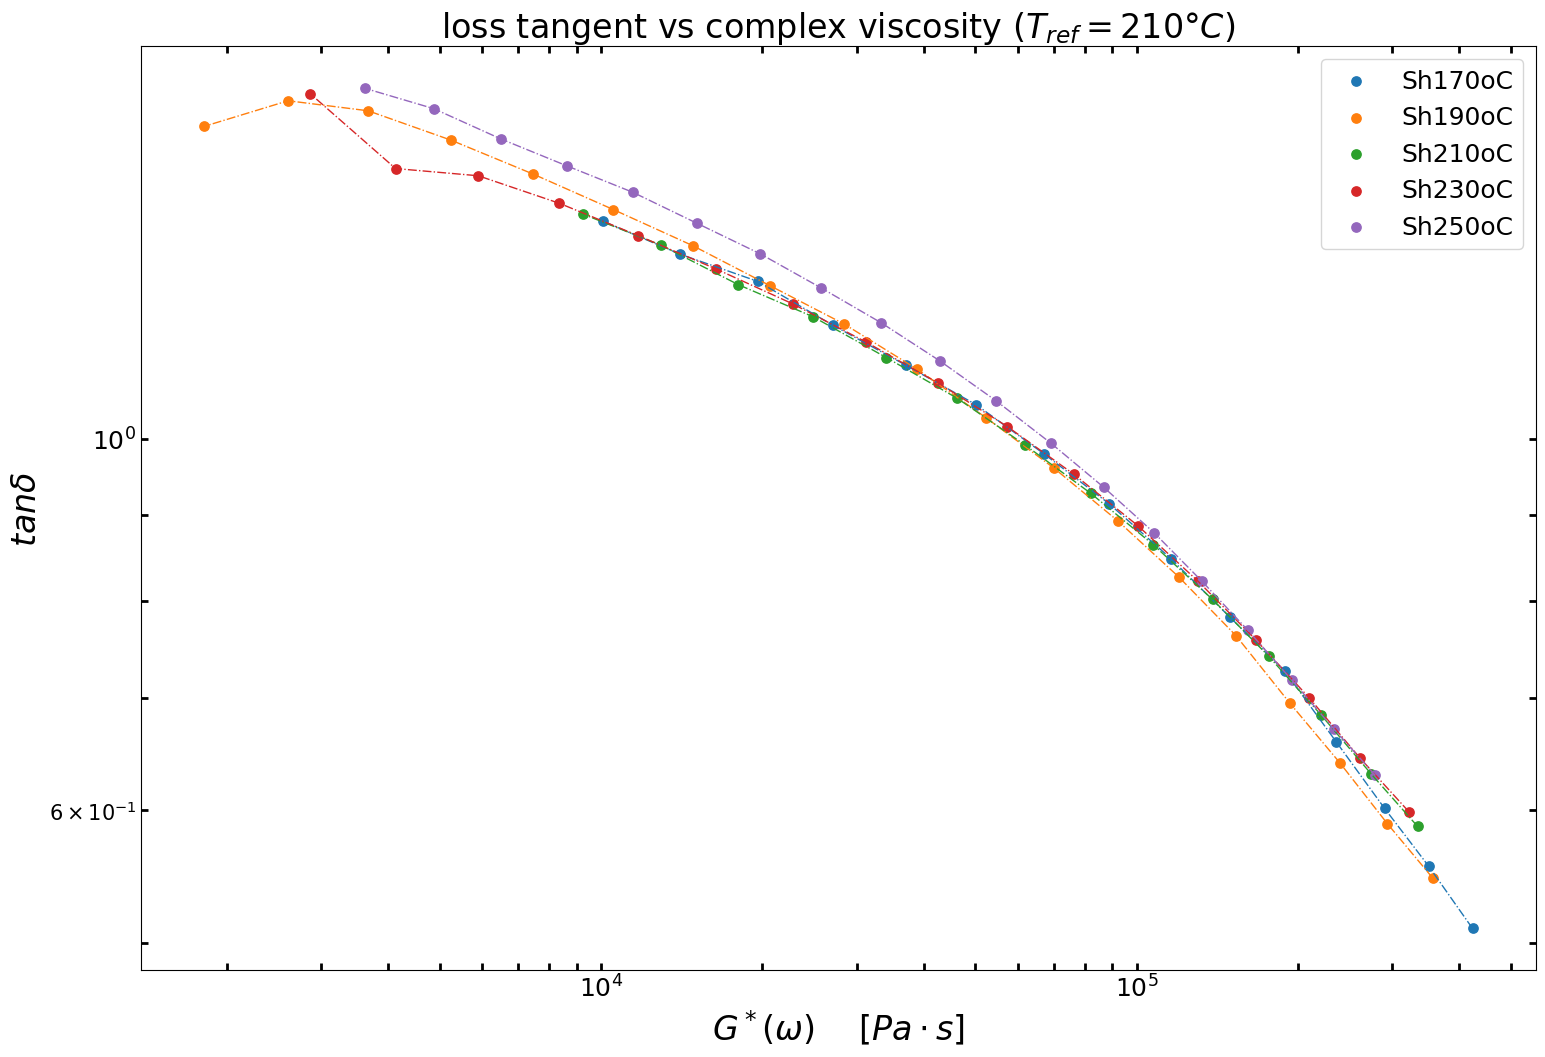

In [10]:
# Set plot size and axis labels' font size
pltname = "loss tangent vs complex viscosity (" + r'$T_{ref} = 210°C$' + ")";
scale   = 6;
fig     = plt.figure(figsize=(3*scale, 2*scale));
plt.rc('xtick', labelsize=15);
plt.rc('ytick', labelsize=15);
plt.tight_layout();

# Iterate the data per sample
sample_id = '';
for i in range(len(df.columns)):
    if ("frecuencia" in df.columns[i]):
        sample_id = df.columns[i].split('_')[1];
        
        # Define x axis as the date axis
        x_str = 'bT_Gc_' + sample_id; x_units = r'$[Pa \cdot s]$';
        y_str = 'tand_' + sample_id;         y_units = '';

        # Remove NANs from interesting x,y data
        df_fil = pd.DataFrame(df);
        df_fil = df_fil.dropna(subset=[x_str, y_str]);

        # Stablish the plot area
        ax0 = plt.gca();

        # Extract data from a specific country
        x  = df_fil.iloc[:][x_str];
        y = df_fil.iloc[:][y_str];

        # Scatter the data and plot a curve to join the points
        plt.scatter(x, y, s=45, marker='o', label=sample_id);
        plt.plot(x, y, linewidth=1, linestyle='-.');
        
# Show the plot lengend to link colors and polymer names
handles, labels = ax0.get_legend_handles_labels();
lgd = dict(zip(labels, handles));

# fig.autofmt_xdate();
ax0.set_xlabel(r'$G^*(\omega)$' + '    ' + x_units, fontsize=24);
ax0.set_ylabel(r'$tan \delta$', fontsize=24);

for tick in ax0.xaxis.get_major_ticks(): tick.label.set_fontsize(18);
for tick in ax0.yaxis.get_major_ticks(): tick.label.set_fontsize(18);
ax0.tick_params(which='both', direction='in', length=5, width=2, bottom=True, top=True, left=True, right=True);

# Display main plot
plt.yscale('log');
plt.xscale('log');
plt.legend(lgd.values(), lgd.keys(), prop={'size': 18}, loc="best");
plt.title(pltname, size=24);
plt.savefig(pltname + '.png', dpi=200, bbox_inches='tight');
plt.show();
mpl.rcParams.update(mpl.rcParamsDefault); # Recover matplotlib defaults

---
## Get the activation energy $E_H$ and $E_V$
## $$ \log a_T  \ vs.\  \left( \frac{1}{T} - \frac{1}{T_0} \right) $$

In [11]:
def _invT(T, T0):
    invT = (1/T) - (1/T0);
    return invT;

# Declare sample temperatures in Celsius and Kelvin
T_C    = pd.Series([170, 190, 210, 230, 250, 180, 225]);
T_K    = T_C + 273.15;
T_Cref = T_C[2];
T_Kref = T_K[2];

---
## Plot $\log a_T$ and $\log b_T$ vs. $\left( \frac{1}{T} - \frac{1}{T_0} \right)$ and fit a linear regression to get $E_H$ and $E_V$

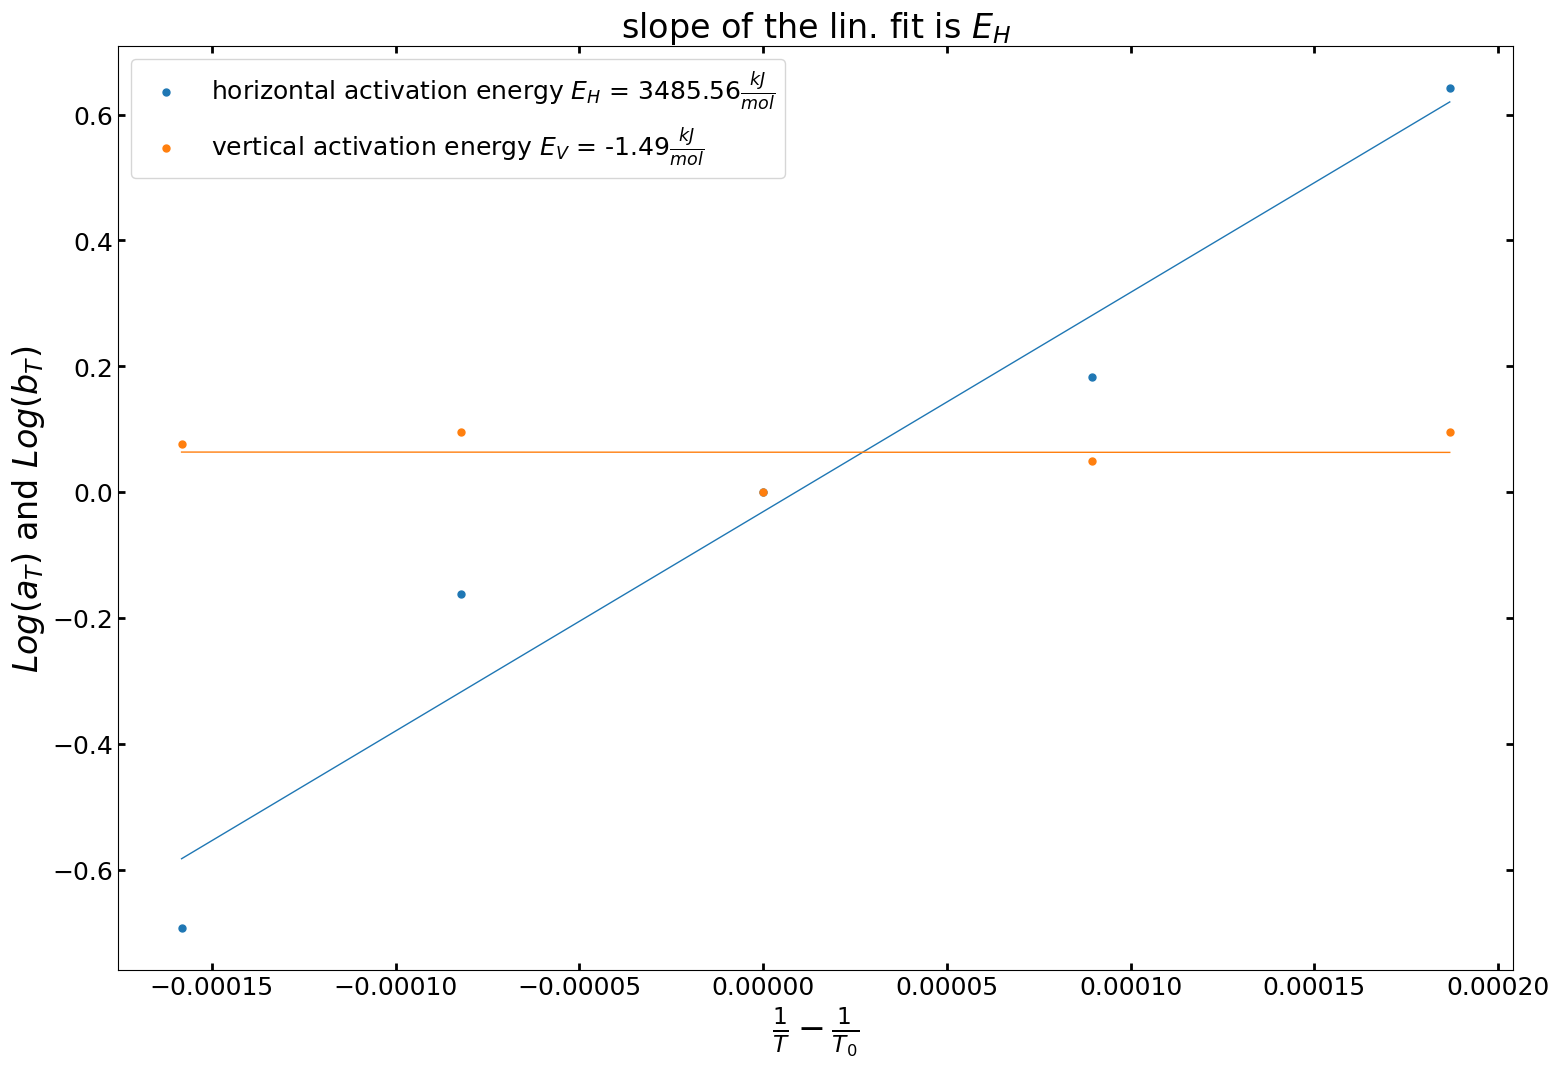

In [12]:
# Set plot size and axis labels' font size
pltname = "slope of the lin. fit is $E_H$";
scale   = 6;
fig     = plt.figure(figsize=(3*scale, 2*scale));
plt.rc('xtick', labelsize=15);
plt.rc('ytick', labelsize=15);
plt.tight_layout();
ax0 = plt.gca();

# calculate varibles
x = _invT(T_K[:-2], T_Kref);

# HORIZONTAL ACTIVATION ENERGY EH

# perform a linear regression
y = np.log(a_T);
model = LinearRegression().fit(np.array(x).reshape((-1, 1)), np.array(y));
# get the slope
E_H = model.coef_[0];

# plot variables and lin. fit
plt.scatter(x, y, s=25, label='horizontal activation energy ' + r'$E_H$' + " = " + str(round(E_H, 2)) + r'$\frac{kJ}{mol}$');
plt.plot(x, model.predict(np.array(x).reshape((-1, 1))), linewidth=1);

# VERTICAL ACTIVATION ENERGY EV

# perform a linear regression
y = np.log(b_T);
model = LinearRegression().fit(np.array(x).reshape((-1, 1)), np.array(y));
# get the slope
E_V = model.coef_[0];

# plot variables and lin. fit
plt.scatter(x, y, s=25, label='vertical activation energy ' + r'$E_V$' + " = " + str(round(E_V, 2)) + r'$\frac{kJ}{mol}$');
plt.plot(x, model.predict(np.array(x).reshape((-1, 1))), linewidth=1);
        
# Show the plot lengend to link colors and polymer names
handles, labels = ax0.get_legend_handles_labels();
lgd = dict(zip(labels, handles));

# fig.autofmt_xdate();
ax0.set_xlabel(r'$\frac{1}{T} - \frac{1}{T_0}$', fontsize=24);
ax0.set_ylabel(r'$Log(a_T)$' + ' and ' + r'$Log(b_T)$', fontsize=24);

for tick in ax0.xaxis.get_major_ticks(): tick.label.set_fontsize(18);
for tick in ax0.yaxis.get_major_ticks(): tick.label.set_fontsize(18);
ax0.tick_params(which='both', direction='in', length=5, width=2, bottom=True, top=True, left=True, right=True);

# Display main plot
plt.yscale('linear');
plt.xscale('linear');
plt.legend(lgd.values(), lgd.keys(), prop={'size': 18}, loc="best");
plt.title(pltname, size=24);
plt.savefig(pltname + '.png', dpi=200, bbox_inches='tight');
plt.show();
mpl.rcParams.update(mpl.rcParamsDefault); # Recover matplotlib defaults

---
## Compute the shift factor $a_T$ for arbitrary temperatures with the Williams-Landell-Ferry (WLF) equation
$$ a_T = \exp \left[ E_H \left( \frac{1}{T} - \frac{1}{T_0} \right) \right] $$
$$ b_T = \exp \left[ E_V \left( \frac{1}{T} - \frac{1}{T_0} \right) \right] $$

In [13]:
at1 = np.exp(E_H*_invT(T_K[5], T_Kref));
at2 = np.exp(E_H*_invT(T_K[6], T_Kref));

bt1 = np.exp(E_V*_invT(T_K[5], T_Kref));
bt2 = np.exp(E_V*_invT(T_K[6], T_Kref));

a_T = a_T.append(pd.Series([at1, at2]));
b_T = b_T.append(pd.Series([bt1, bt2]));

display('a_T'); display(a_T);
display('b_T'); display(b_T);
display('T_C'); display(T_C);

'a_T'

0    1.900000
1    1.200000
2    1.000000
3    0.850000
4    0.500000
0    1.612211
1    0.804744
dtype: float64

'b_T'

0    1.100000
1    1.050000
2    1.000000
3    1.100000
4    1.080000
0    0.999795
1    1.000093
dtype: float64

'T_C'

0    170
1    190
2    210
3    230
4    250
5    180
6    225
dtype: int64

---
## $$ \eta^*(\omega) = \frac{G^*(\omega)}{\omega} $$

In [14]:
def _etac(G2, w):
    etac = G2/w;
    return etac;

# Iterate the data per sample
sample_id = '';
etacmaster_Sh210oC = pd.Series([]);
freqmaster_Sh210oC = pd.Series([]);
for i in range(len(df.columns)):
    if ("frecuencia" in df.columns[i]):
        sample_id = df.columns[i].split('_')[1];
        
        # Compute Complex Viscosity
        df['aT_etac_' + sample_id] = _etac(df['bT_Gc_' + sample_id], df['aT_frequency_' + sample_id]);
        
        # Store master curve
        etacmaster_Sh210oC = etacmaster_Sh210oC.append(df['aT_etac_' + sample_id]);
        freqmaster_Sh210oC = freqmaster_Sh210oC.append(df['aT_frequency_' + sample_id]);

# Sort data
freqmaster_Sh210oC = freqmaster_Sh210oC.reset_index(drop=True)
etacmaster_Sh210oC = etacmaster_Sh210oC.reset_index(drop=True)
mastercurve = pd.DataFrame()
mastercurve['freq'] = pd.Series(freqmaster_Sh210oC)
mastercurve['eta']  = pd.Series(etacmaster_Sh210oC)
mastercurve = mastercurve.sort_values('freq')
        
df = df.reindex(sorted(df.columns), axis=1);
print("./data.csv"); display(df);

./data.csv


,G1_Sh170oC,G1_Sh190oC,G1_Sh210oC,G1_Sh230oC,G1_Sh250oC,G2_Sh170oC,G2_Sh190oC,G2_Sh210oC,G2_Sh230oC,G2_Sh250oC,Gc_Sh170oC,Gc_Sh190oC,Gc_Sh210oC,Gc_Sh230oC,Gc_Sh250oC,aT_etac_Sh170oC,aT_etac_Sh190oC,aT_etac_Sh210oC,aT_etac_Sh230oC,aT_etac_Sh250oC,aT_frequency_Sh170oC,aT_frequency_Sh190oC,aT_frequency_Sh210oC,aT_frequency_Sh230oC,aT_frequency_Sh250oC,bT_Gc_Sh170oC,bT_Gc_Sh190oC,bT_Gc_Sh210oC,bT_Gc_Sh230oC,bT_Gc_Sh250oC,frecuencia_Sh170oC,frecuencia_Sh190oC,frecuencia_Sh210oC,frecuencia_Sh230oC,frecuencia_Sh250oC,tand_Sh170oC,tand_Sh190oC,tand_Sh210oC,tand_Sh230oC,tand_Sh250oC
0,343000.0,298000.0,288545.00,251301.00,218582.00,175000.0,163000.0,169359.00,150515.00,137616.00,385063.631105,339666.012430,334575.384489,292928.246890,258294.897704,445.863152,594.415522,669.150769,758.167227,1115.833958,950.0000,600.00000,500.000000,425.000000,250.000000,423569.994216,356649.313051,334575.384489,322221.071579,278958.489520,500.000,500.0000,500.000000,500.000000,500.000000,0.510204,0.546980,0.586941,0.598943,0.629585
1,279000.0,241000.0,231412.00,199744.00,179203.00,155000.0,142000.0,146049.00,128738.00,120310.00,319164.534371,279723.077346,273645.435089,237636.567430,215843.024694,657.578175,871.023817,973.231457,1093.742177,1477.828600,533.9000,337.20000,281.172000,238.996200,157.738500,351080.987808,293709.231213,273645.435089,261400.224173,233110.466669,281.000,281.0000,281.172000,281.172000,315.477000,0.555556,0.589212,0.631121,0.644515,0.671362
2,226000.0,192000.0,182623.00,156375.00,146499.00,136000.0,123000.0,124870.00,109503.00,105154.00,263765.046964,228019.735988,221232.179009,190903.241549,180331.141839,966.494176,1262.767525,1399.167572,1562.458520,1956.861640,300.2000,189.60000,158.117000,134.399450,99.525500,290141.551661,239420.722787,221232.179009,209993.565704,194757.633186,158.000,158.0000,158.117000,158.117000,199.051000,0.601770,0.640625,0.683758,0.700259,0.717780
3,179000.0,151000.0,141545.00,120746.00,118516.00,118000.0,105000.0,105000.00,91613.60,91057.70,214394.496198,183918.460194,176238.437990,151567.305910,149457.508963,1396.210679,1810.221065,1982.077894,2205.968839,2570.452094,168.9100,106.68000,88.916000,75.578600,62.796000,235833.945818,193114.383203,176238.437990,166724.036502,161414.109680,88.900,88.9000,88.916000,88.916000,125.592000,0.659218,0.695364,0.741814,0.758730,0.768316
4,139000.0,116000.0,108073.00,91516.80,94743.10,101000.0,88500.0,86653.80,75213.80,77870.90,171819.672913,145904.934803,138523.118588,118458.602021,122638.216166,1989.490950,2553.336359,2770.351558,3065.864712,3342.897432,95.0000,60.00000,50.002000,42.501700,39.621100,189001.640205,153200.181544,138523.118588,130304.462223,132449.273459,50.000,50.0000,50.002000,50.002000,79.242200,0.726619,0.762931,0.801808,0.821858,0.821916
5,107000.0,87900.0,81183.40,68305.90,74972.20,83700.0,72700.0,70188.50,60615.80,65873.40,135848.040104,114068.838865,107318.078476,91323.442688,99800.478959,2798.892004,3551.965623,3816.608822,4203.013609,4311.553153,53.3900,33.72000,28.118700,23.900895,24.999000,149432.844114,119772.280808,107318.078476,100455.786957,107784.517275,28.100,28.1000,28.118700,28.118700,49.998000,0.782243,0.827076,0.864567,0.887417,0.878638
6,80300.0,65500.0,60144.90,50295.80,58668.40,68100.0,58500.0,55798.10,47883.30,54882.00,105288.650860,87820.840351,82041.678186,69444.063220,80336.884944,3858.011857,4863.495906,5188.406526,5683.401593,5500.712331,30.0200,18.96000,15.812500,13.440625,15.773200,115817.515946,92211.882369,82041.678186,76388.469542,86763.835740,15.800,15.8000,15.812500,15.812500,31.546400,0.848070,0.893130,0.927728,0.952034,0.935461
7,59600.0,48100.0,43975.30,36564.70,45439.30,54500.0,46200.0,43587.80,37176.90,45151.80,80761.438818,66693.702851,61917.068074,52144.982306,64057.903710,5259.462595,6564.340832,6963.162549,7588.962978,6951.516608,16.8910,10.66800,8.892090,7.558276,9.952150,88837.582700,70028.387994,61917.068074,57359.480537,69182.536007,8.890,8.8900,8.892090,8.892090,19.904300,0.914430,0.960499,0.9911

---
## Plot master curve for complex viscosity vs frequency

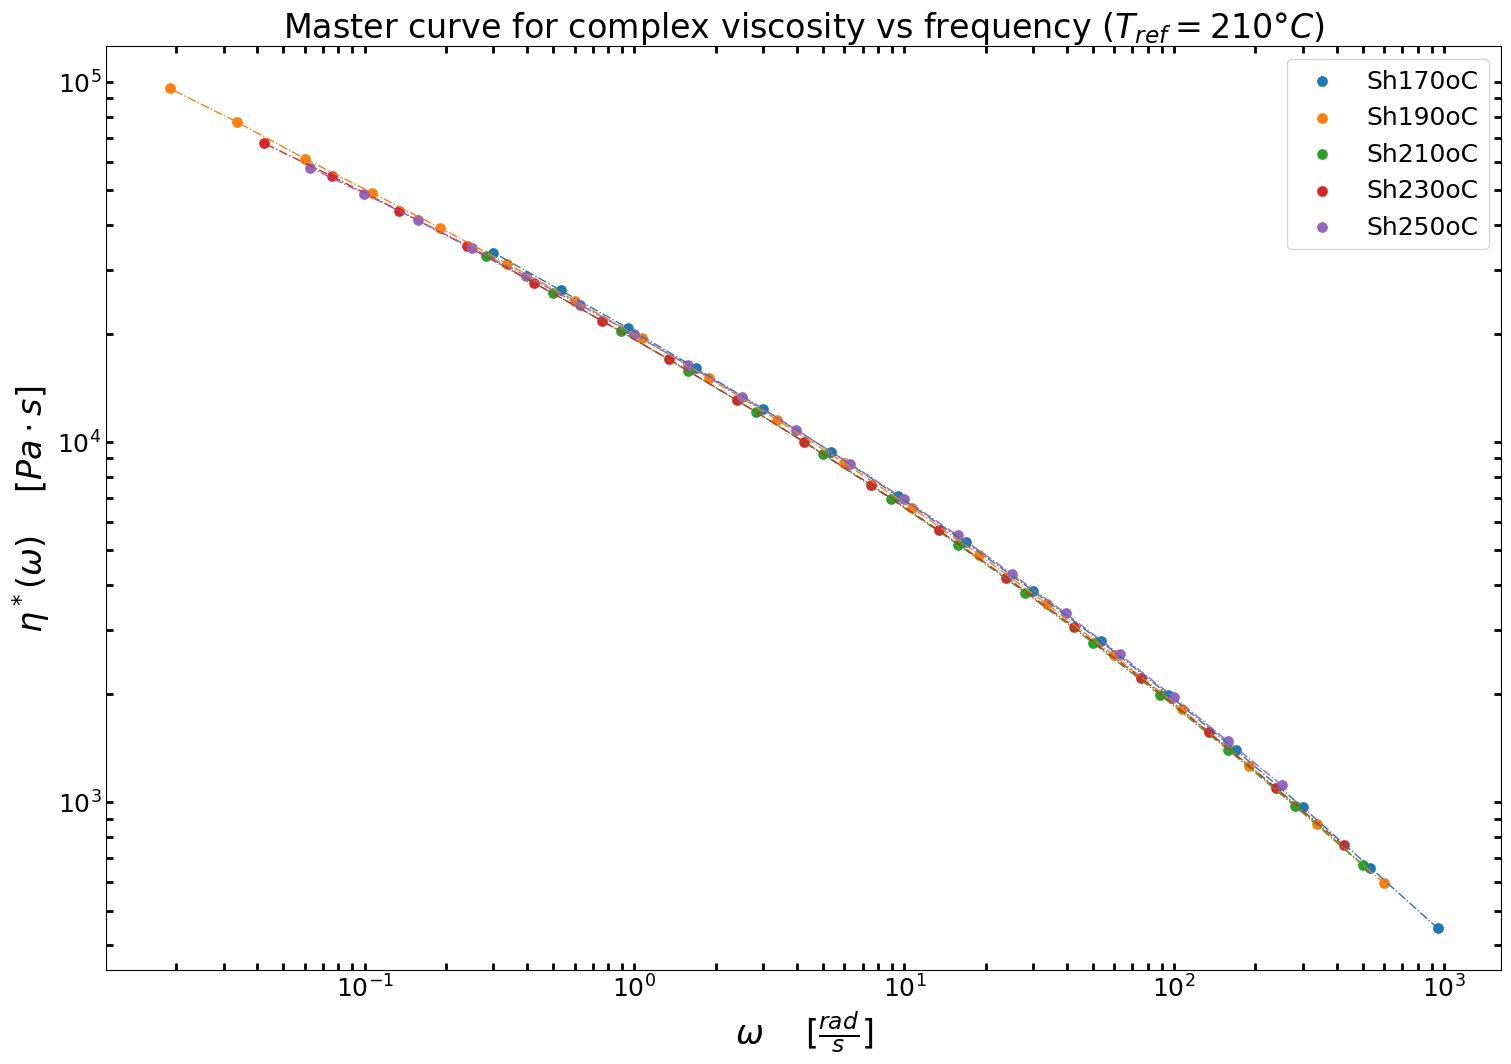

In [15]:
# Set plot size and axis labels' font size
pltname = "Master curve for complex viscosity vs frequency (" + r'$T_{ref} = 210°C$' + ")";
scale   = 6;
fig     = plt.figure(figsize=(3*scale, 2*scale));
plt.rc('xtick', labelsize=15);
plt.rc('ytick', labelsize=15);
plt.tight_layout();

# Iterate the data per sample

sample_id = '';
for i in range(len(df.columns)):
    if ("frecuencia" in df.columns[i]):
        sample_id = df.columns[i].split('_')[1];
        
        # Define x axis as the date axis
        x_str = 'aT_frequency_' + sample_id; x_units = r'$[\frac{rad}{s}]$';
        y_str = 'aT_etac_' + sample_id;      y_units = r'$[Pa \cdot s]$';

        # Remove NANs from interesting x,y data
        df_fil = pd.DataFrame(df);
        df_fil = df_fil.dropna(subset=[x_str, y_str]);

        # Stablish the plot area
        ax0 = plt.gca();

        # Extract data from a specific country
        x = df_fil.iloc[:][x_str];
        y = df_fil.iloc[:][y_str];

        # Scatter the data and plot a curve to join the points
        plt.scatter(x, y, s=45, marker='o', label=sample_id);
        plt.plot(x, y, linewidth=1, linestyle='-.');
        
# Show the plot lengend to link colors and polymer names
handles, labels = ax0.get_legend_handles_labels();
lgd = dict(zip(labels, handles));

# fig.autofmt_xdate();
ax0.set_xlabel(r'$\omega$' + '    ' + x_units, fontsize=24);
ax0.set_ylabel(r'$\eta^*(\omega)$' + '    ' + y_units, fontsize=24);

for tick in ax0.xaxis.get_major_ticks(): tick.label.set_fontsize(18);
for tick in ax0.yaxis.get_major_ticks(): tick.label.set_fontsize(18);
ax0.tick_params(which='both', direction='in', length=5, width=2, bottom=True, top=True, left=True, right=True);

# Display main plot
plt.yscale('log');
plt.xscale('log');
plt.legend(lgd.values(), lgd.keys(), prop={'size': 18}, loc="best");
plt.title(pltname, size=24);
plt.savefig(pltname + '.png', dpi=200, bbox_inches='tight');
plt.show();
mpl.rcParams.update(mpl.rcParamsDefault); # Recover matplotlib defaults

---
## Plot complex viscosity vs frequency @different temperatures

[170 190 210 230 250 180 225]


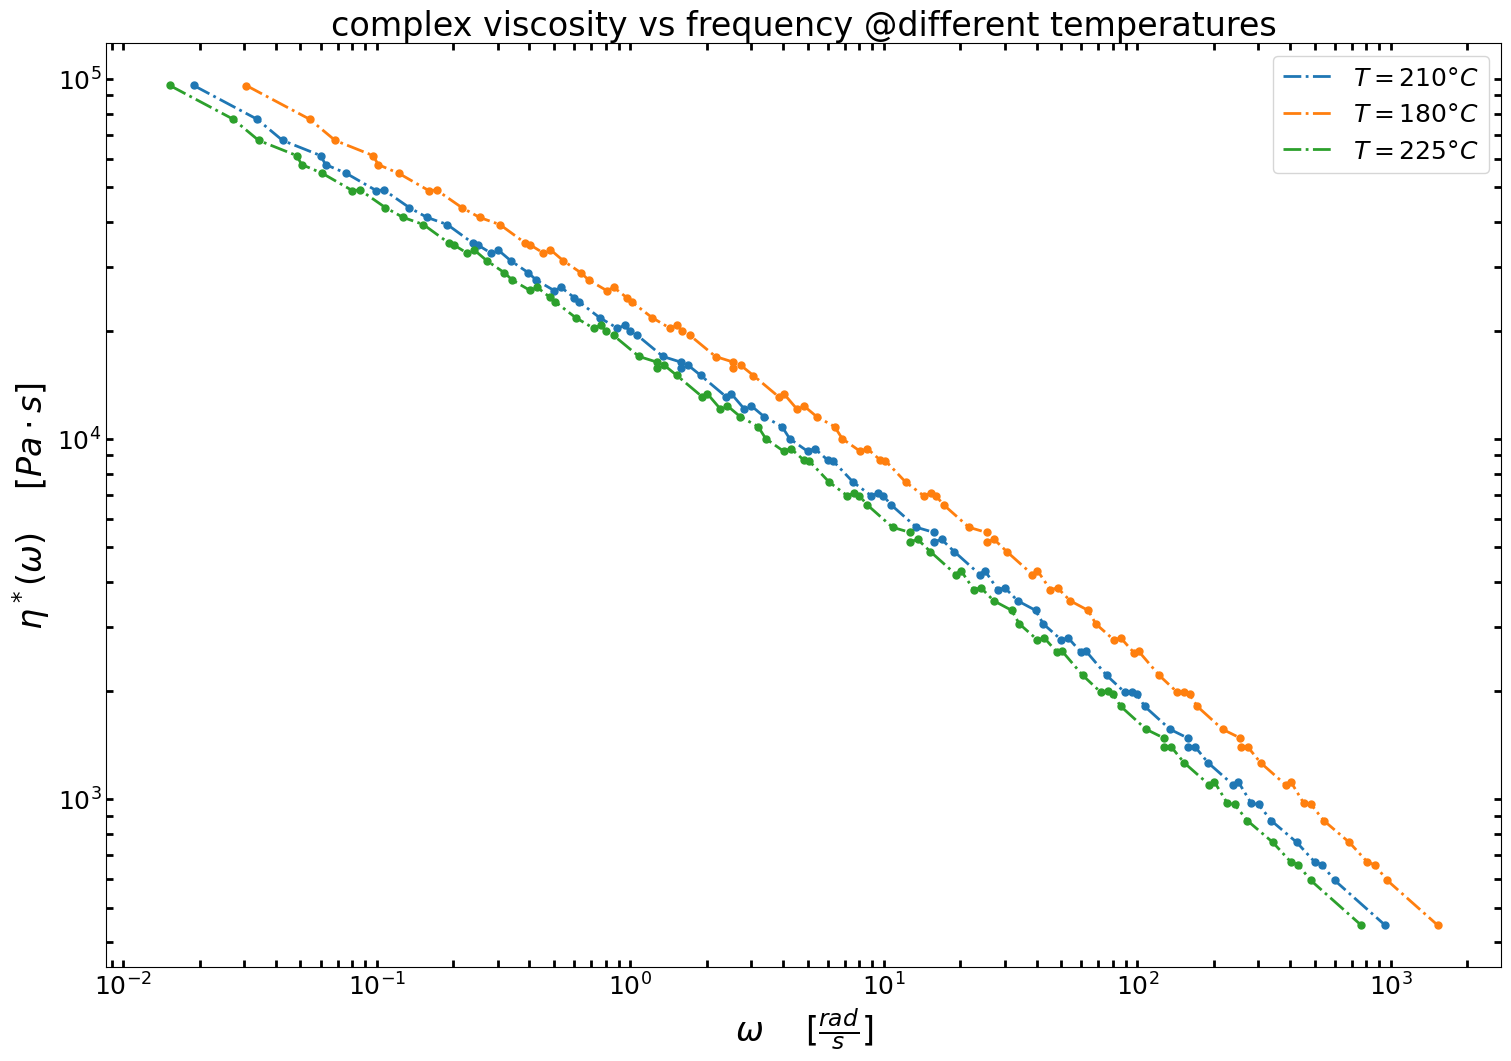

In [16]:
# Set plot size and axis labels' font size
pltname = "complex viscosity vs frequency @different temperatures";
scale   = 6;
fig     = plt.figure(figsize=(3*scale, 2*scale));
plt.rc('xtick', labelsize=15);
plt.rc('ytick', labelsize=15);
plt.tight_layout();

# Stablish the plot area
ax0 = plt.gca();

# Extract data from a specific country
x = mastercurve['freq'];
y = mastercurve['eta'];

# Scatter the data and plot a curve to join the points
print(np.array(T_C))
for T, a, b in zip(T_C, a_T, b_T):
    if T in [210, 180, 225]:
        plt.scatter(x*a, y*b, s=25, marker='o');
        plt.plot(x*a, y*b, linewidth=2, linestyle='-.', label=r'$T = $' + str(T) + '$ °C$');
        
# Show the plot lengend to link colors and polymer names
handles, labels = ax0.get_legend_handles_labels();
lgd = dict(zip(labels, handles));

# fig.autofmt_xdate();
ax0.set_xlabel(r'$\omega$' + '    ' + x_units, fontsize=24);
ax0.set_ylabel(r'$\eta^*(\omega)$' + '    ' + y_units, fontsize=24);

for tick in ax0.xaxis.get_major_ticks(): tick.label.set_fontsize(18);
for tick in ax0.yaxis.get_major_ticks(): tick.label.set_fontsize(18);
ax0.tick_params(which='both', direction='in', length=5, width=2, bottom=True, top=True, left=True, right=True);

# Display main plot
plt.yscale('log');
plt.xscale('log');
plt.legend(lgd.values(), lgd.keys(), prop={'size': 18}, loc="best");
plt.title(pltname, size=24);
plt.savefig(pltname + '.png', dpi=200, bbox_inches='tight');
plt.show();
mpl.rcParams.update(mpl.rcParamsDefault); # Recover matplotlib defaults

---
# References

* J. Ahmed, Time–Temperature Superposition Principle and its Application to Biopolymer and Food Rheology, in: Adv. Food Rheol. Its Appl., Elsevier, 2017: pp. 209–241. https://doi.org/10.1016/B978-0-08-100431-9.00009-7.
* A. Oseli, A. Aulova, M. Gergesova, I. Emri, Time-Temperature Superposition in Linear and Non-linear Domain, Mater. Today Proc. 3 (2016) 1118–1123. https://doi.org/10.1016/j.matpr.2016.03.059.
* H. Mavridis, R.N. Shroff, Temperature dependence of polyolefin melt rheology, Polym. Eng. Sci. 32 (1992) 1778–1791. https://doi.org/10.1002/pen.760322307.